# Exploratory Data Analysis (EDA) of Movie Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset and remove extra spaces from column names
df = pd.read_csv('mymoviedb.csv', engine='python')

# handle extra space
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Display the first few rows to inspect the data
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
# check column names
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [4]:
# check size of data
df.shape

(9837, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [6]:
df.isnull().sum()

Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64

In [7]:
# check null row in the all columns
null_all_rows = df.loc[df['Title'].isnull()]
null_all_rows

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
1106,- Just Desserts,None,None,NaN,None,None,None,None,None
1107,- If The Hue Fits,None,None,NaN,None,None,None,None,None
1108,- Dust Up,None,None,NaN,None,None,None,None,None
1109,- Scents And Sensibility,None,None,NaN,None,None,None,None,None
1110,- Just One Of The Girls,None,None,NaN,None,None,None,None,None
1111,- Volleybug,None,None,NaN,None,None,None,None,None
1112,- Hide And Tink,None,None,NaN,None,None,None,None,None
1113,- Rainbow's Ends,None,None,NaN,None,None,None,None,None
1114,- Fawn And Games,None,None,NaN,None,None,None,None,None


In [8]:
# check NUll row in vote count
null_rows_of_vote_count = df[df['Vote_Count'].notna() & df['Vote_Count'].str.isalpha()]
null_rows_of_vote_count

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
1115,- Magic Tricks,61.328,35,7.1,en,Animation,https://image.tmdb.org/t/p/original/6iXYe7AkQ1...,None,None


In [9]:
# Dropping rows with missing values since they are few
df_cleaned = df.dropna()

# Converting relevant columns to appropriate data types
df_cleaned['Release_Date'] = pd.to_datetime(df_cleaned['Release_Date'])
df_cleaned['Vote_Count'] = pd.to_numeric(df_cleaned['Vote_Count'], errors='coerce')
df_cleaned['Vote_Average'] = pd.to_numeric(df_cleaned['Vote_Average'], errors='coerce')

# Confirming the changes
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9826 non-null   datetime64[ns]
 1   Title              9826 non-null   object        
 2   Overview           9826 non-null   object        
 3   Popularity         9826 non-null   float64       
 4   Vote_Count         9826 non-null   int64         
 5   Vote_Average       9826 non-null   float64       
 6   Original_Language  9826 non-null   object        
 7   Genre              9826 non-null   object        
 8   Poster_Url         9826 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 767.7+ KB


C:\Users\DELL\AppData\Local\Temp\ipykernel_18060\1257531427.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Release_Date'] = pd.to_datetime(df_cleaned['Release_Date'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_18060\1257531427.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Vote_Count'] = pd.to_numeric(df_cleaned['Vote_Count'], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_18060\1257531427.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [11]:
df_cleaned.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9826,9826.000000,9826.000000,9826.000000
mean,2006-09-23 04:47:14.276409600,40.323951,1392.943721,6.439467
min,1902-04-17 00:00:00,13.354000,0.000000,0.000000
25%,2000-10-17 12:00:00,16.128250,146.000000,5.900000
50%,2011-09-12 00:00:00,21.195000,444.000000,6.500000
75%,2017-11-22 00:00:00,35.179250,1376.000000,7.100000
max,2024-07-03 00:00:00,5083.954000,31077.000000,10.000000
std,NaN,108.879332,2611.303856,1.129797


In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9826 non-null   datetime64[ns]
 1   Title              9826 non-null   object        
 2   Overview           9826 non-null   object        
 3   Popularity         9826 non-null   float64       
 4   Vote_Count         9826 non-null   int64         
 5   Vote_Average       9826 non-null   float64       
 6   Original_Language  9826 non-null   object        
 7   Genre              9826 non-null   object        
 8   Poster_Url         9826 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 767.7+ KB


In [13]:
df_cleaned.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

# Exploratory Data Analysis Questions

### Q1: What is the most frequent genre in the dataset?

In [14]:
# Splitting and counting genres manually
all_genres = df_cleaned['Genre'].str.split(', ').sum()

# Create a dictionary to store genre counts
genre_counts = {}
for genre in all_genres:
    genre_counts[genre] = genre_counts.get(genre, 0) + 1

# Find the most frequent genre
most_frequent_genre = max(genre_counts.items(), key=lambda x: x[1])
most_frequent_genre


('Drama', 3744)

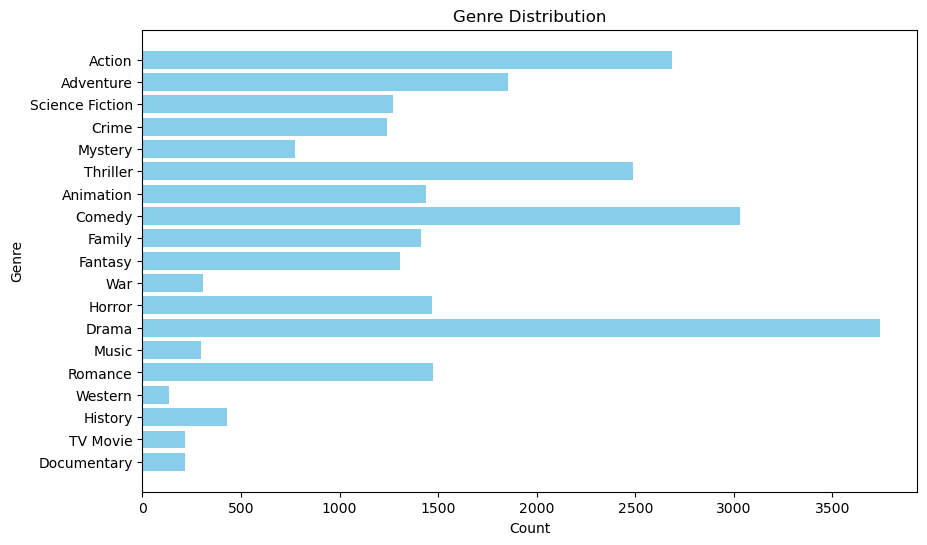

In [15]:
# Extract genres and their counts
genres = list(genre_counts.keys())
counts = list(genre_counts.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(genres, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Genre Distribution')
plt.gca().invert_yaxis()  # Invert for better readability
plt.show()


### Q2: What genres has highest votes?

In [16]:
# Creating a DataFrame for genres and their corresponding votes
genre_votes = []

# Iterate through each row to account for multiple genres
for _, row in df_cleaned.iterrows():
    genres = row['Genre'].split(', ')
    for genre in genres:
        genre_votes.append((genre, row['Vote_Count']))

# Convert to DataFrame and calculate total votes by genre
genre_votes_df = pd.DataFrame(genre_votes, columns=['Genre', 'Vote_Count'])
top_voted_genres = genre_votes_df.groupby('Genre')['Vote_Count'].sum().sort_values(ascending=False)

# Display the top 5 genres with the highest votes
top_voted_genres.head()


Genre
Drama        5141495
Action       4868675
Adventure    4313869
Comedy       3933497
Thriller     3631594
Name: Vote_Count, dtype: int64

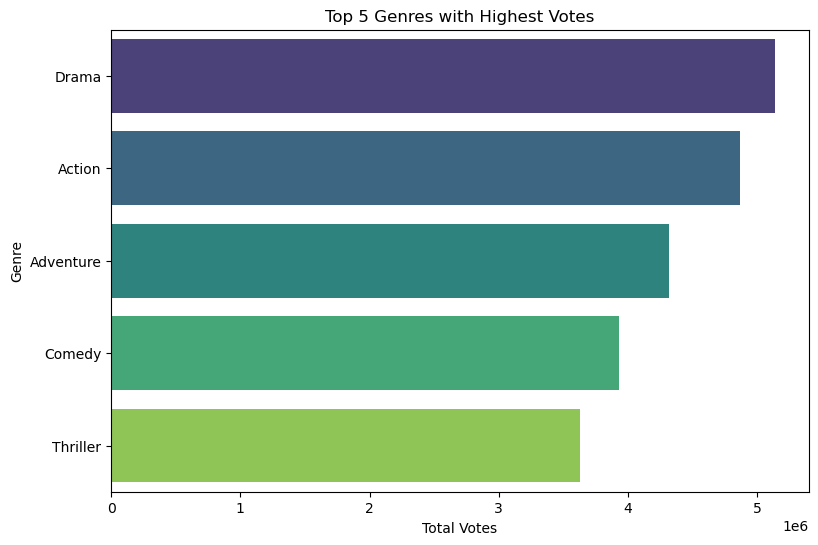

In [17]:
# Get the top 5 genres with the highest votes
top_5_genres = top_voted_genres.head(5)

# Plotting the data
plt.figure(figsize=(9, 6))
sns.barplot(x=top_5_genres.values, y=top_5_genres.index, palette='viridis')
plt.xlabel('Total Votes')
plt.ylabel('Genre')
plt.title('Top 5 Genres with Highest Votes')
plt.show()


### Q3: What movie got the highest popularity? what's its genre?

In [18]:
# Finding the movie with the highest popularity
most_popular_movie = df_cleaned.loc[df_cleaned['Popularity'].idxmax(), ['Title', 'Genre', 'Popularity']]
most_popular_movie

Title                    Spider-Man: No Way Home
Genre         Action, Adventure, Science Fiction
Popularity                              5083.954
Name: 0, dtype: object

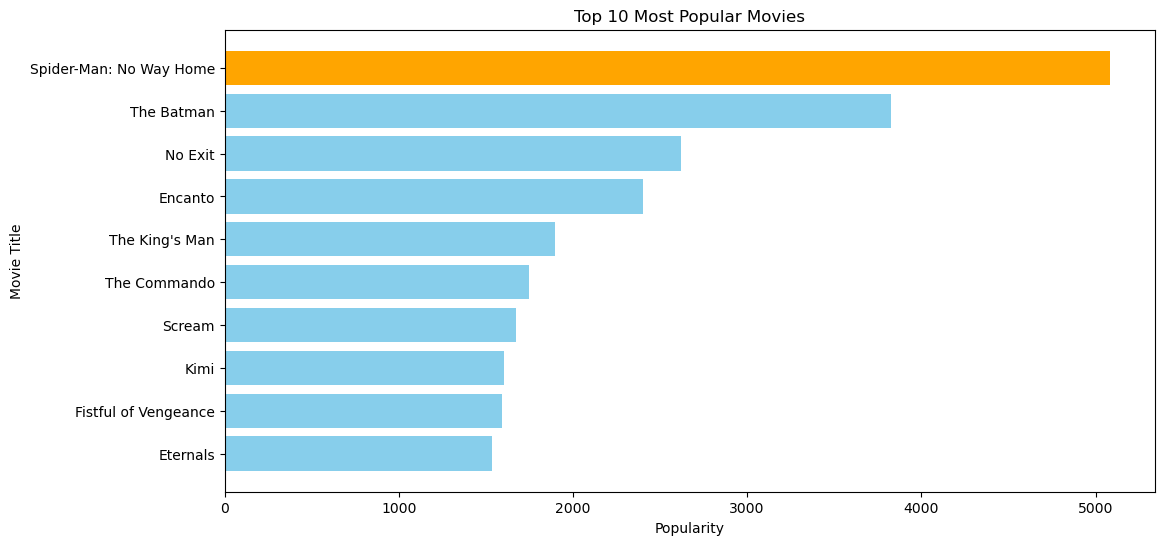

In [19]:
# Plot the top 10 most popular movies
top_10_popular = df_cleaned.nlargest(10, 'Popularity')

plt.figure(figsize=(12, 6))
plt.barh(top_10_popular['Title'], top_10_popular['Popularity'], color='skyblue')
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.title('Top 10 Most Popular Movies')
plt.gca().invert_yaxis()  # Invert for better readability

# Highlight the most popular movie
plt.barh(most_popular_movie['Title'], most_popular_movie['Popularity'], color='orange')

plt.show()


### Q4: Which year has the most filmmed movies?

In [20]:
# Extracting the release year and counting movies per year
df_cleaned['Release_Year'] = df_cleaned['Release_Date'].dt.year
movies_per_year = df_cleaned['Release_Year'].value_counts()

# Finding the year with the most movies released
most_movies_year = movies_per_year.idxmax()
most_movies_count = movies_per_year.max()

most_movies_year, most_movies_count

C:\Users\DELL\AppData\Local\Temp\ipykernel_18060\385040447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Release_Year'] = df_cleaned['Release_Date'].dt.year


(2021, 714)